# 로지스틱 회귀의 성능평가 지표

> 자세한 설명은 README.md 파일 참고

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
from helper.classification import *
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, precision_recall_curve

### [2] 데이터 가져오기

In [3]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None

데이터프레임 상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   

## #02. 데이터 전처리 및 로지스틱 분석

### [1] 0값을 평균으로 대체

In [4]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)

df2 = my_replace_missing_value(df)
my_pretty_table(df2.describe().T)

+--------------------------+---------+----------+----------+-------+---------+---------+---------+-------+
|                          |   count |     mean |      std |   min |     25% |     50% |     75% |   max |
|--------------------------+---------+----------+----------+-------+---------+---------+---------+-------|
| Pregnancies              |     768 |  3.84505 |  3.36958 |     0 |       1 |       3 |       6 |    17 |
| Glucose                  |     768 |  121.687 |  30.4359 |    44 |   99.75 |     117 |  140.25 |   199 |
| BloodPressure            |     768 |  72.4052 |  12.0963 |    24 |      64 | 72.2026 |      80 |   122 |
| SkinThickness            |     768 |  29.1534 |  8.79094 |     7 |      25 | 29.1534 |      32 |    99 |
| Insulin                  |     768 |  155.548 |  85.0211 |    14 |   121.5 | 155.548 | 155.548 |   846 |
| BMI                      |     768 |  32.4575 |  6.87515 |  18.2 |    27.5 |    32.4 |    36.6 |  67.1 |
| DiabetesPedigreeFunction |     768 

### [3] 스케일링

In [5]:
df3 = my_standard_scaler(df2, yname='Outcome')
my_pretty_table(df3.head())

+----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |      Insulin |       BMI |   DiabetesPedigreeFunction |        Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------|
|  0 |      0.639947 |  0.865108 |      -0.0335182 |        0.665502 | -3.34508e-16 |  0.166292 |                   0.468492 |      1.426 |         1 |
|  1 |     -0.844885 |  -1.20616 |       -0.529859 |      -0.0174634 | -3.34508e-16 | -0.852531 |                  -0.365061 |  -0.190672 |         0 |
|  2 |       1.23388 |   2.01581 |       -0.695306 |     8.08794e-16 | -3.34508e-16 |  -1.33283 |                   0.604397 |  -0.105584 |         1 |
|  3 |     -0.844885 |  -1.07465 |       -0.529859 |       -0.700429 |    -0.724389 | -0

### [4] 데이터 분할

In [6]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [4] 로지스틱 분석 모형

In [33]:
estimator = my_logistic_classification(x_train,y_train, x_test,y_test)
estimator

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  9 |   0.1 | l2        |          0.772065 |
| 13 |     1 | l2        |          0.767186 |
|  3 | 0.001 |           |          0.765547 |
|  7 |  0.01 |           |          0.765547 |
| 11 |   0.1 |           |          0.765547 |
| 15 |     1 |           |          0.765547 |
| 17 |    10 | l2        |          0.765547 |
| 19 |    10 |           |          0.765547 |
| 21 |   100 | l2        |          0.765547 |
| 23 |   100 |           |          0.765547 |
|  5 |  0.01 | l2        |          0.755738 |
|  1 | 0.001 | l2        |          0.657977 |
+----+-------+-----------+-------------------+



LogisticRegression(C=0.1, n_jobs=-1)

## #03. 로지스틱의 예측값

### [1] 예측 결과값

`0`, `1`중에서 예측 결과를 의미

In [34]:
y_pred = estimator.predict(x_test)
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

### [2] 위,양성 확률

`0`으로 분류될 확률과 `1`로 분류될 확률을 의미

In [35]:
y_pred_prob = estimator.predict_proba(x_test)
y_pred_prob[:5]

array([[0.14581305, 0.85418695],
       [0.63274845, 0.36725155],
       [0.42265887, 0.57734113],
       [0.94969679, 0.05030321],
       [0.90292213, 0.09707787]])

In [36]:
y_pred_prob_1 = estimator.predict_proba(x_test)[:,1]
y_pred_prob_1[:5]

array([0.85418695, 0.36725155, 0.57734113, 0.05030321, 0.09707787])

## #04. 의사결정계수

### [1] 로그손실값

In [11]:
log_loss_test = -log_loss(y_test, y_pred_prob, normalize=False)
log_loss_test

-66.87796503414953

### [2] 로그 손실 계산

In [12]:
y_null = np.ones_like(y_test) * y_test.mean()
log_loss_null = -log_loss(y_test, y_null, normalize=False)
log_loss_null

-102.00757977909427

### [3] 의사결정계수

In [13]:
pseudo_r2 = 1- (log_loss_test / log_loss_null)
pseudo_r2

0.34438239610253263

## #05. 혼동행렬(오차행렬)

### [1] 혼동행렬 구하기

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[86, 10],
       [25, 33]], dtype=int64)

### [2] 혼동행렬값 분리

In [15]:
((TN, FP), (FN, TP)) = conf_mat
TN, TP, FN, FP

(86, 33, 25, 10)

### [3] 혼동행렬에 대한 히트맵

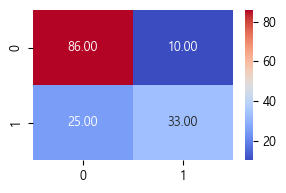

In [16]:
my_heatmap(conf_mat, figsize=(3,2), dpi=100)

### [4] ConfusionMatrixDisplay 함수 사용

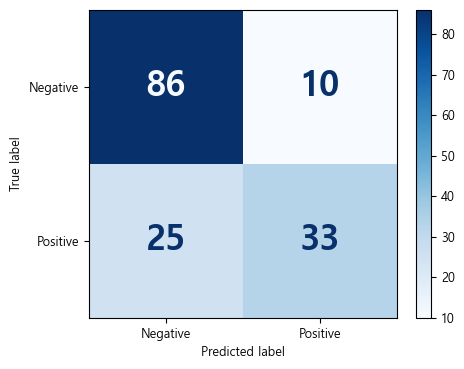

In [17]:
plt.figure(figsize=(5,4),dpi=100)
ax=plt.gca()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Negative', 'Positive'],
    cmap=plt.cm.Blues,
    text_kw = {'fontsize':25, 'weight': 'bold'},
    ax=ax

)

plt.show()
plt.close()

### [5] 성능지표 값들 구하기

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다. 이런 경우 정밀도 혹은 재현율을 사용하는 것이 더욱 바람직하다.

#### (1) 정확도(Accuracy)

전체 데이터(FP+FN+TP+TN)중에서 제대로 판정한 데이터(TP + TN)의 비율

$\text{Accuracy}=\frac{\text{정확히 예측한 데이터 건수}}{\text{전체 예측 데이터 건수}}=\frac{\text{TN}+\text{TP}}{\text{TN}+\text{FP}+\text{FN}+\text{TP}}$

In [18]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7727272727272727

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7727272727272727

#### (2) 정밀도(Precision)

양성으로 예측한 데이터 중에서 관측치도 양성으로 예측한 비율.

$\text{Precision}=\frac{\text{예측과 실제 값이 Positive로 일치하는 것들}}{\text{Positive로 예측한 것들}}=\frac{\text{TP}}{\text{FP}+\text{TP}}$

실제 음성인 데이터를 양성으로 판단하는 것이 더 큰 문제인 경우에 사용한다.(ex: 스팸 메일 분류 모델)

In [20]:
precision = TP / (FP + TP)
precision

0.7674418604651163

In [21]:
precision = precision_score(y_test, y_pred)
precision

0.7674418604651163

#### (3) 재현율(Recall, TPR)

실제로 양성인 관측치 중에서 양성으로 예측한 비율

TPR(True Positive Rate) 또는 민감도(sensitivity)라고도 한다.

$\text{TPR}=\frac{\text{예측과 실제 값이 Positive로 일치하는 것들}}{\text{실제 값이 Positive인 것들}}=\frac{\text{TP}}{\text{FN}+\text{TP}}$

실제 양성인 데이터를 음성으로 판단하는 것이 더 큰 문제인 경우에 사용한다.(ex: 암 판단 모델)

In [22]:
tpr = TP / (FN + TP)
tpr

0.5689655172413793

In [23]:
tpr = recall_score(y_test, y_pred)
tpr

0.5689655172413793

#### (4) 위양성율, 거짓 양성 비율(Fallout, FPR)

실제로는 음성인 관측치 중에서 양성으로 예측한 비율

FPR(False Positive Rate)이라고도 한다.

$\text{FPR}=\frac{\text{양성으로 예측한 데이터 건수}}{\text{실제 값이 Negative인 것들}}=\frac{\text{FP}}{\text{FP}+\text{TN}}$

In [24]:
fpr = FP / (TN + FP)
fpr

0.10416666666666667

#### (5) 특이성(Specificity, TNR)

1에서 위양성률의 값을 뺀 값으로 실제 값 Negative가 정확히 예측되어야 하는 수준을 의미한다.

TNR, True Negative Rate

$\text{TNR}=1-FPR=1-\frac{\text{FP}}{\text{FP}+\text{TN}}$

In [25]:
tnr = 1 - (FP / (TN + FP))
tnr

0.8958333333333334

#### (6) F1 Score

정밀도(Precision)와 재현율(Recall)을 결합한 지표이다. 

정밀도(Precision)와 재현율(Recall)이 어느 한 쪽으로 치우치지 않을 때 상대적으로 높은 값을 가진다.

$\text{F1}=2 \times \frac{\text{Precision} \times \text{FPR}}{\text{Precision}+\text{FPR}}$

In [26]:
f1 = 2 * (precision * tpr) / (precision + tpr)
f1

0.6534653465346535

In [27]:
f1 = f1_score(y_test, y_pred)
f1

0.6534653465346535

#### (7) ROC Curve

재현율(recall, FPR)을 X축으로, 위양성률(fall-out, TPR)을 Y축으로 잡은 그래프

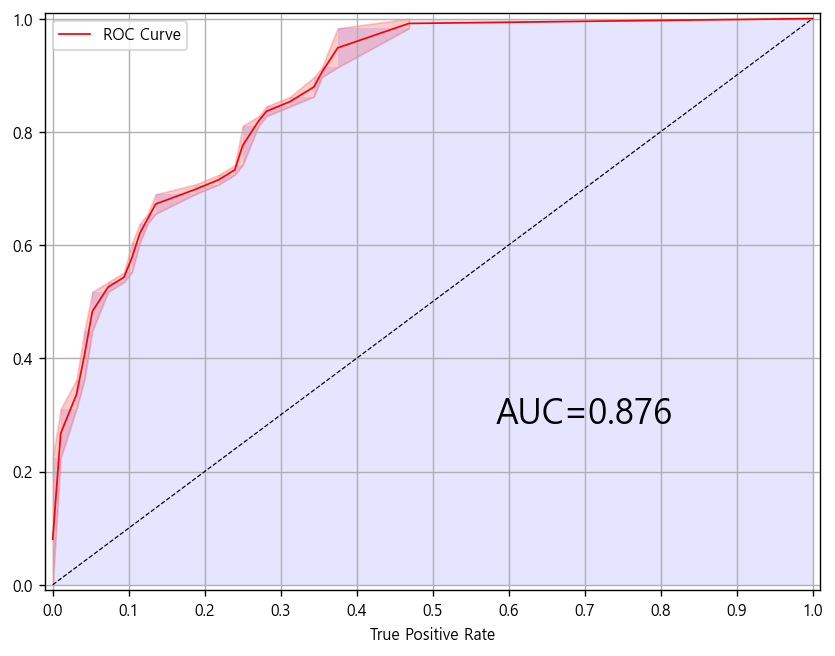

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_1)

plt.figure(figsize=(8, 6), dpi = 125)

sb.lineplot(x=fpr, y=tpr, color='red', linewidth=1, label='ROC Curve')
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.1)
sb.lineplot(x=[0,1], y=[0,1], color='black', linestyle='--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.xticks(np.round(np.arange(0,1.1,0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.text(0.7, 0.3, 'AUC=%0.3f' % roc_auc_score(y_test, y_pred_prob_1), fontsize=20, ha='center', va='center')
plt.grid()
plt.show()
plt.close()





#### (8) AUC

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정된다.

ㅡROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.

In [29]:
auc = roc_auc_score(y_test, y_pred_prob_1)
auc

0.8760775862068966

#### (9) 분류 결과 보고서

In [30]:
cr = classification_report(y_test, y_pred, target_names=['Negative','Positive'])
print(cr)

              precision    recall  f1-score   support

    Negative       0.77      0.90      0.83        96
    Positive       0.77      0.57      0.65        58

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



#### (9) Precision Recall Curve

정밀도-재현율 곡선

0부터 1사이의 모든 임계값에 따라 x축을 재현율, y축을 정밀도로 그린 그림.

정밀도와 재현율 모두 높을수록(그래프의 오른쪽 위) 좋은 모델.

`precision_recall_curve()` 함수는 관측치와 예측 확률을 인자로 받아 threshold, precision, recall에 해당하는 세 개의 array을 반환한다.

precision과 recall값은 plot했을때 그래프가 항상 y축에서 시작하도록 하기 위해 맨 마지막에 각각 1, 0이 붙는다.

> 다항로지스틱에서는 사용할 수 없음

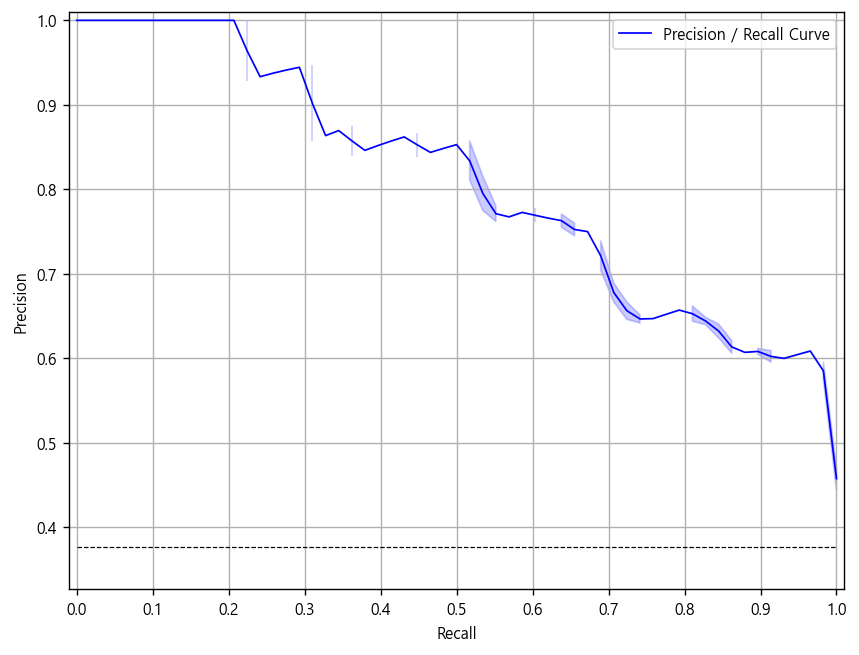

In [32]:
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_prob_1)
y_test_mean = y_test.mean()

plt.figure(figsize=(8,6), dpi=125)
sb.lineplot(x=recall, y=precision, label='Precision / Recall Curve', color='blue', linewidth=1)
sb.lineplot(x=[0,1], y=[y_test_mean,y_test_mean], color='black', linewidth=0.7, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xticks(np.round(np.arange(0,1.1,0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(y_test_mean-0.05,1.01)
plt.grid()
plt.show()
plt.close()





#### (10) 학습곡선

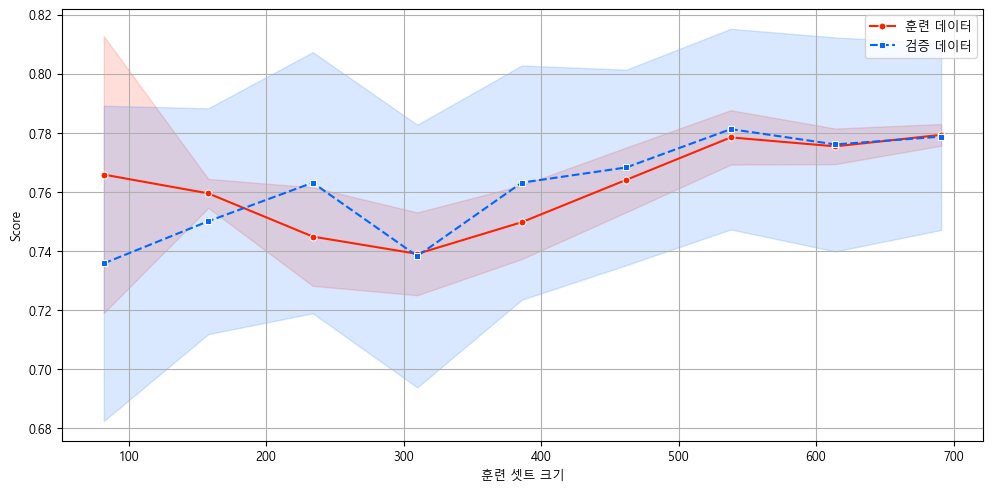

In [37]:
my_learing_curve(estimator, origin, 'Outcome', figsize=(10,5), dpi=100)